In [1]:
import greeks as gk
from datetime import datetime, timedelta

In [2]:
# Instantiate an environment

# This lets us keep a uniform notion of "now"
e = gk.Env(datetime.today())

In [3]:
# instantiate a point in time at which our contract began, 1 year ago
start = gk.Point(env=e, at=e.now().eval() - timedelta(days=365), name="Start")

# instantiate an end date for our contract in 1 year
end = gk.Point(env=e, at=e.now().eval() + timedelta(days=365), name="End")

In [4]:
# fix `now` to be same as start, 1 year ago
e.now().setValue(start())

In [5]:
# instatiate a rate for our risk free rate at the time of contract creation, 5%
rfr = gk.Rate(env=e, value=0.05, at=start)

# instantiate an equity to represent our underlying, $200 at time of creation
asset = gk.Equity(env=e, value=200, at=start)

In [6]:
# now we instantiate our forward contract
n = gk.Forward(env=e, start=start, end=end, underlying=asset, risk_free_rate=rfr)

In [7]:
# Because the start date of our contract equals the end date, we expect the value of the forward to equal the current value
n()

0.0

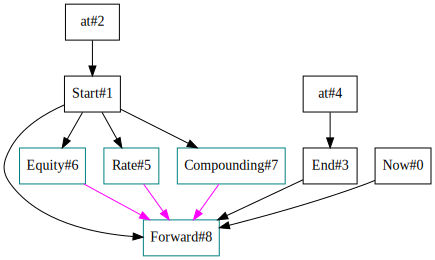

In [8]:
# Let's preview the dependency graph
n.graphviz()

In [9]:
# Let's fast forward one year to today
e.now().setValue(datetime.today())

In [10]:
# The value of the forward should now be worth -$10,
# since we could have compounded for ~1 year
# at 5% risk-free (e.g. $190 1 year ago is worth $200 today)
n()

-9.523811690082312

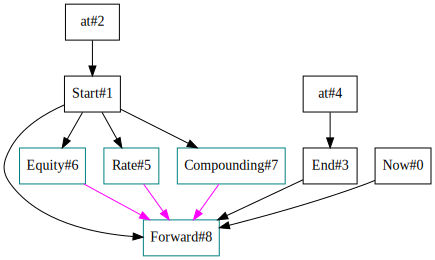

In [11]:
# The dependency graph is quite simple
n.graphviz()

In [16]:
# If we adjust the risk free rate as of 1 year ago, how do things change?
rfr.setValue(0.10, at=start())

In [17]:
# The contract should now be worth $18, by the same logic
n()

-18.18182222121729